In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# --- load data ---
dataset = pd.read_csv("Wine.csv")
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# --- split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# --- scale ---
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# --- apply Kernel PCA ---
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.05)   # try 'linear', 'poly', 'rbf', 'sigmoid'
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# --- fit classifier ---
classifier = LogisticRegression(random_state=0, max_iter=5000)
classifier.fit(X_train_kpca, y_train)

# --- predict ---
y_pred = classifier.predict(X_test_kpca)

# --- evaluation ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)


Confusion Matrix:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
Accuracy: 0.9722222222222222


C:\Users\Nishok\AppData\Local\Temp\ipykernel_24000\956142989.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


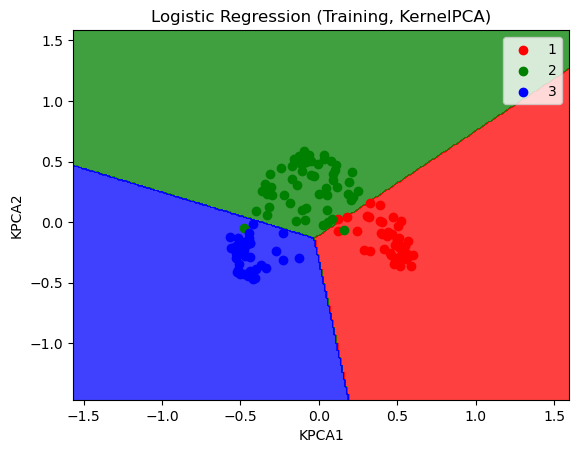

C:\Users\Nishok\AppData\Local\Temp\ipykernel_24000\956142989.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


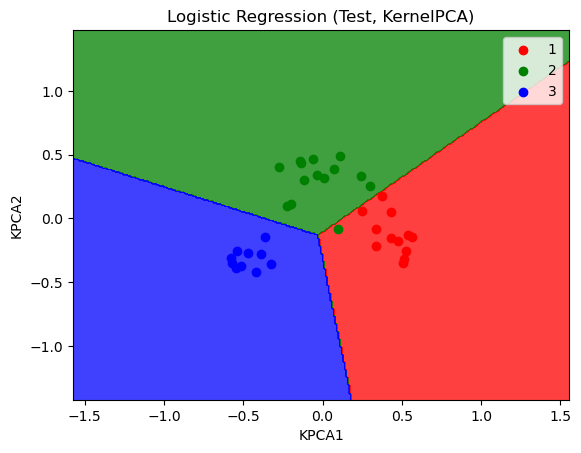

In [2]:
from matplotlib.colors import ListedColormap

def plot_decision(X_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    plt.contourf(
        X1, X2,
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(("red", "green", "blue"))
    )
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(("red", "green", "blue"))(i), label=j)
    plt.title(title)
    plt.xlabel("KPCA1")
    plt.ylabel("KPCA2")
    plt.legend()
    plt.show()

plot_decision(X_train_kpca, y_train, "Logistic Regression (Training, KernelPCA)")
plot_decision(X_test_kpca, y_test, "Logistic Regression (Test, KernelPCA)")


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("kpca", KernelPCA(n_components=2, kernel="rbf", gamma=0.05)),
    ("clf", SVC(kernel="linear", random_state=0))
])

pipe.fit(X_train, y_train)
print("Test Accuracy (SVC + KernelPCA):", accuracy_score(y_test, pipe.predict(X_test)))


Test Accuracy (SVC + KernelPCA): 1.0
